## HFT - Report on Finding the Optimal Pairs Trading Strategy for BTC and ETH

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Downloading Previous Day's Data for Calibrating Model Coefficients

In [2]:
BTCy = yf.download('BTC-USD', start='2023-04-19', end='2023-04-20',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTCy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-19 00:00:00,30394.187500,30394.187500,30394.187500,30394.187500,30394.187500,0
2023-04-19 00:02:00,30378.404297,30378.404297,30378.404297,30378.404297,30378.404297,0
2023-04-19 00:03:00,30369.562500,30369.562500,30369.562500,30369.562500,30369.562500,0
2023-04-19 00:04:00,30363.355469,30363.355469,30363.355469,30363.355469,30363.355469,0
2023-04-19 00:05:00,30366.031250,30366.031250,30366.031250,30366.031250,30366.031250,3301376
...,...,...,...,...,...,...
2023-04-19 23:51:00,28786.287109,28786.287109,28786.287109,28786.287109,28786.287109,10098688
2023-04-19 23:52:00,28789.636719,28789.636719,28789.636719,28789.636719,28789.636719,61100032
2023-04-19 23:54:00,28830.521484,28830.521484,28830.521484,28830.521484,28830.521484,29782016


In [4]:
ETHy = yf.download('ETH-USD', start='2023-04-19', end='2023-04-20',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETHy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-19 00:00:00,2103.946289,2103.946289,2103.946289,2103.946289,2103.946289,0
2023-04-19 00:02:00,2102.981201,2102.981201,2102.981201,2102.981201,2102.981201,0
2023-04-19 00:03:00,2102.642090,2102.642090,2102.642090,2102.642090,2102.642090,0
2023-04-19 00:04:00,2102.314697,2102.314697,2102.314697,2102.314697,2102.314697,0
2023-04-19 00:05:00,2102.274902,2102.274902,2102.274902,2102.274902,2102.274902,2086912
...,...,...,...,...,...,...
2023-04-19 23:51:00,1933.448364,1933.448364,1933.448364,1933.448364,1933.448364,3580928
2023-04-19 23:52:00,1934.564575,1934.564575,1934.564575,1934.564575,1934.564575,20421632
2023-04-19 23:54:00,1938.015747,1938.015747,1938.015747,1938.015747,1938.015747,6524928


In [6]:
lr1 = np.log(BTCy['Adj Close'] / BTCy['Adj Close'].shift(1))
lr2 = np.log(ETHy['Adj Close'] / ETHy['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1440
mu_2 = lr2.mean() * 1440
sigma_1 = lr1.std() * np.sqrt(1440)
sigma_2 = lr2.std() * np.sqrt(1440)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(BTCy)

In [7]:
result = linregress(np.log(BTCy['Adj Close']), np.log(ETHy['Adj Close']))
beta = result.slope

In [25]:
result

LinregressResult(slope=1.6164669402684022, intercept=-9.031873227194112, rvalue=0.9951743303592179, pvalue=0.0, stderr=0.0046338770584010685, intercept_stderr=0.047704580247806425)

### Downloading Today's Data for Feedback Control

In [8]:
BTC = yf.download('BTC-USD', start='2023-04-20', end='2023-04-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [9]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-20 00:00:00,28823.683594,28823.683594,28823.683594,28823.683594,28823.683594,0
2023-04-20 00:01:00,28810.832031,28810.832031,28810.832031,28810.832031,28810.832031,1452032
2023-04-20 00:02:00,28795.544922,28795.544922,28795.544922,28795.544922,28795.544922,5453824
2023-04-20 00:03:00,28807.896484,28807.896484,28807.896484,28807.896484,28807.896484,1904640
2023-04-20 00:06:00,28816.628906,28816.628906,28816.628906,28816.628906,28816.628906,28360704
...,...,...,...,...,...,...
2023-04-20 23:54:00,28264.910156,28264.910156,28264.910156,28264.910156,28264.910156,0
2023-04-20 23:55:00,28269.878906,28269.878906,28269.878906,28269.878906,28269.878906,0
2023-04-20 23:56:00,28266.107422,28266.107422,28266.107422,28266.107422,28266.107422,0


In [10]:
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1.192000e+03
mean,28671.754727,28671.754727,28671.754727,28671.754727,28671.754727,5.684599e+06
std,273.152645,273.152645,273.152645,273.152645,273.152645,1.244870e+07
min,28037.257812,28037.257812,28037.257812,28037.257812,28037.257812,0.000000e+00
25%,28452.870605,28452.870605,28452.870605,28452.870605,28452.870605,0.000000e+00
50%,28802.840820,28802.840820,28802.840820,28802.840820,28802.840820,1.792000e+05
75%,28888.746582,28888.746582,28888.746582,28888.746582,28888.746582,5.702144e+06
max,29056.951172,29056.951172,29056.951172,29056.951172,29056.951172,1.607332e+08


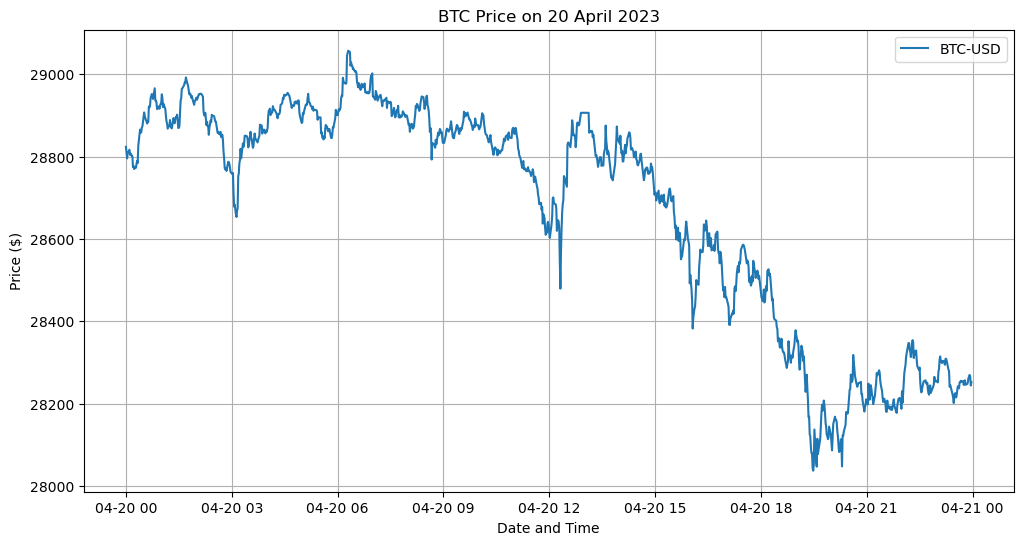

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(BTC['Close'], label='BTC-USD')
plt.xlabel('Date and Time')
plt.ylabel('Price ($)')
plt.title('BTC Price on 20 April 2023')
plt.legend()
plt.grid()
plt.show()

In [12]:
ETH = yf.download('ETH-USD', start='2023-04-20', end='2023-04-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [13]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-20 00:00:00,1936.417969,1936.417969,1936.417969,1936.417969,1936.417969,0
2023-04-20 00:01:00,1934.838501,1934.838501,1934.838501,1934.838501,1934.838501,0
2023-04-20 00:02:00,1933.500488,1933.500488,1933.500488,1933.500488,1933.500488,1747968
2023-04-20 00:03:00,1933.744019,1933.744019,1933.744019,1933.744019,1933.744019,7857152
2023-04-20 00:06:00,1935.309326,1935.309326,1935.309326,1935.309326,1935.309326,11131904
...,...,...,...,...,...,...
2023-04-20 23:54:00,1945.146118,1945.146118,1945.146118,1945.146118,1945.146118,0
2023-04-20 23:55:00,1945.637451,1945.637451,1945.637451,1945.637451,1945.637451,23109632
2023-04-20 23:56:00,1944.978394,1944.978394,1944.978394,1944.978394,1944.978394,0


In [14]:
ETH.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1.192000e+03
mean,1949.254958,1949.254958,1949.254958,1949.254958,1949.254958,3.050019e+06
std,11.618782,11.618782,11.618782,11.618782,11.618782,7.074604e+06
min,1918.132812,1918.132812,1918.132812,1918.132812,1918.132812,0.000000e+00
25%,1941.843109,1941.843109,1941.843109,1941.843109,1941.843109,0.000000e+00
50%,1949.493164,1949.493164,1949.493164,1949.493164,1949.493164,0.000000e+00
75%,1955.540375,1955.540375,1955.540375,1955.540375,1955.540375,2.865920e+06
max,1978.328857,1978.328857,1978.328857,1978.328857,1978.328857,8.597606e+07


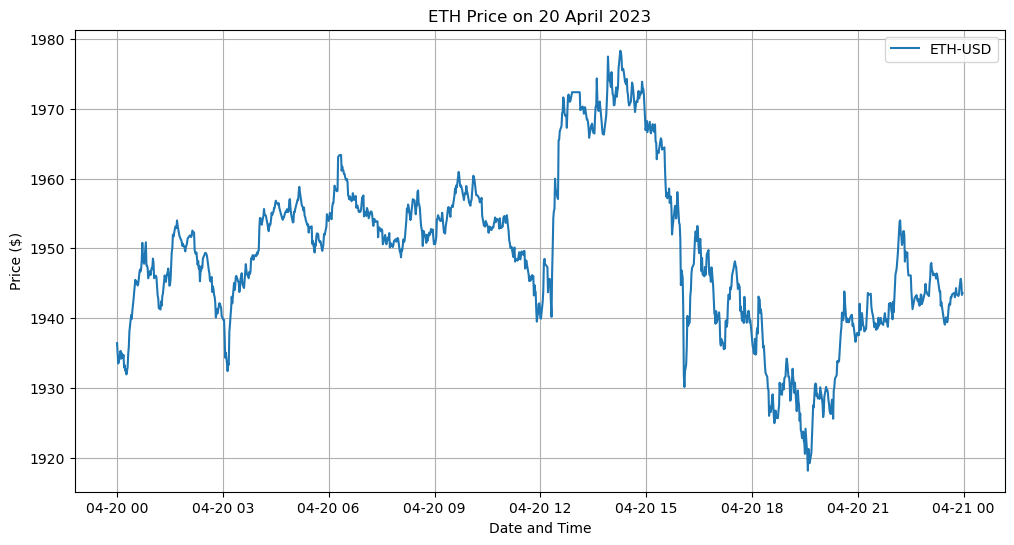

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(ETH['Close'], label='ETH-USD')
plt.xlabel('Date and Time')
plt.ylabel('Price ($)')
plt.title('ETH Price on 20 April 2023')
plt.legend()
plt.grid()
plt.show()

In [16]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [17]:
S1_0

28823.68359375

In [18]:
S2_0

1936.41796875

In [19]:
rho

0.8762852422627018

In [20]:
beta

1.6164669402684022

In [21]:
mu_1

-0.06527786536083667

In [22]:
mu_2

-0.1014501615563625

In [23]:
sigma_1

0.030886360418702075

In [24]:
sigma_2

0.04127523696600412

In [26]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [27]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Cryptocurrency Prices')

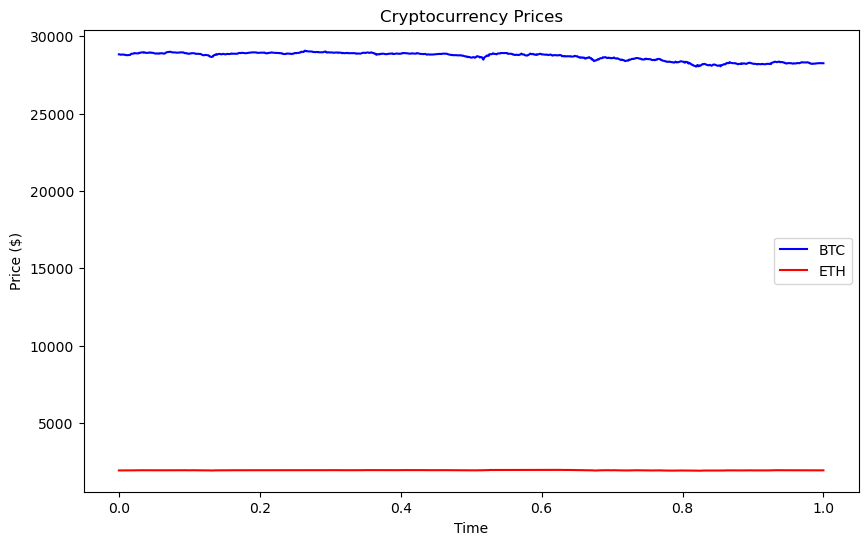

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Cryptocurrency Prices')

Text(0.5, 1.0, 'z')

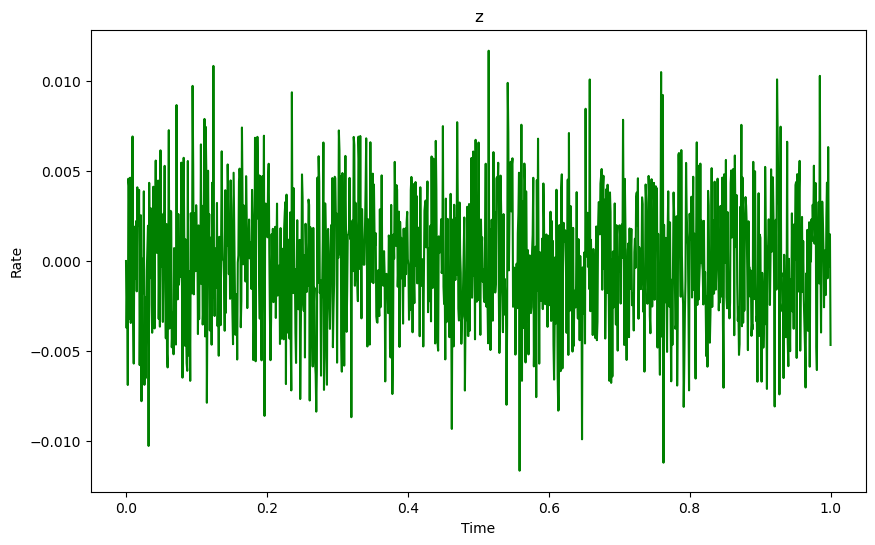

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [31]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho)

Text(0.5, 1.0, 'Weights')

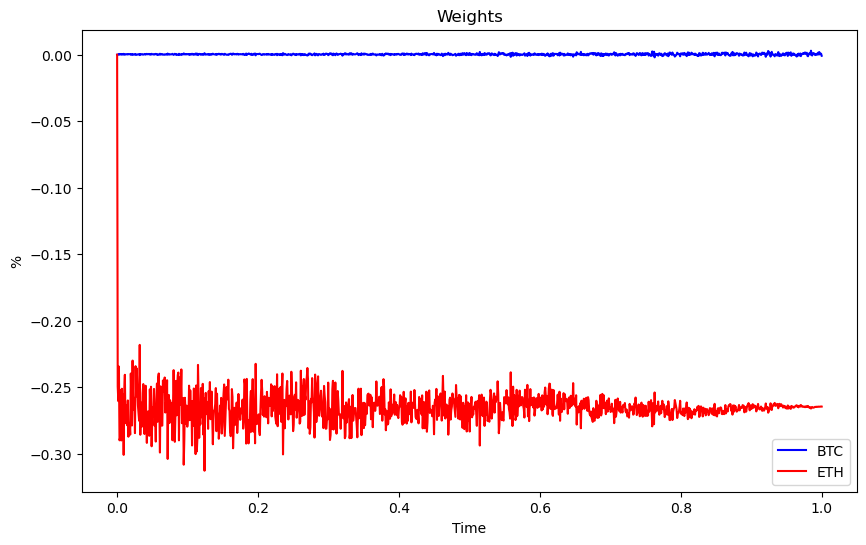

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='BTC')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

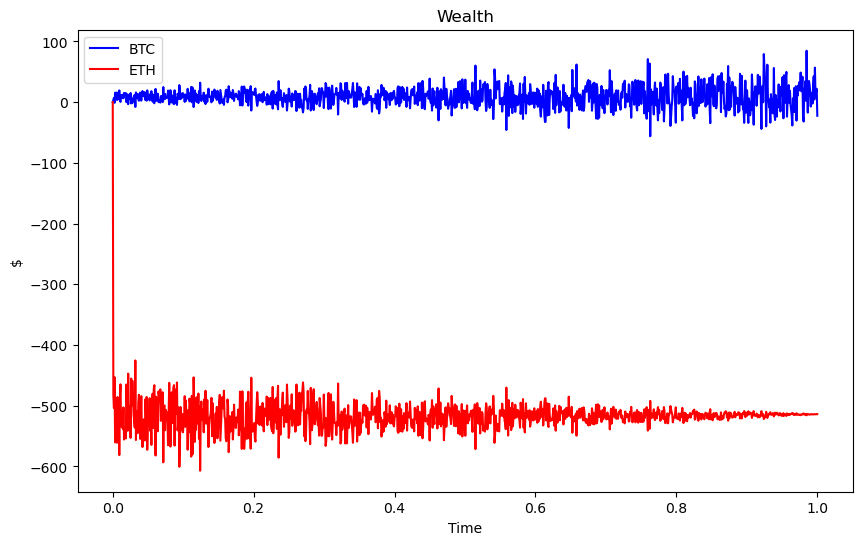

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [35]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

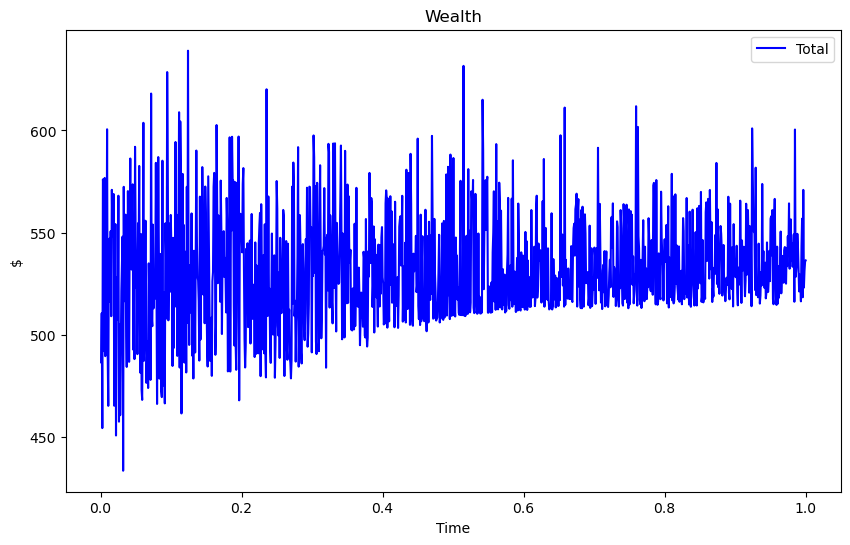

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [37]:
# Initial Wealth
Wealth[1]

array([486.47379814])

In [38]:
# Ending Wealth
Wealth[-1]

array([536.35464198])

In [39]:
# Return
(Wealth[-1] - Wealth[1])/Wealth[1]

array([0.10253552])

Text(0.5, 1.0, 'Comparison')

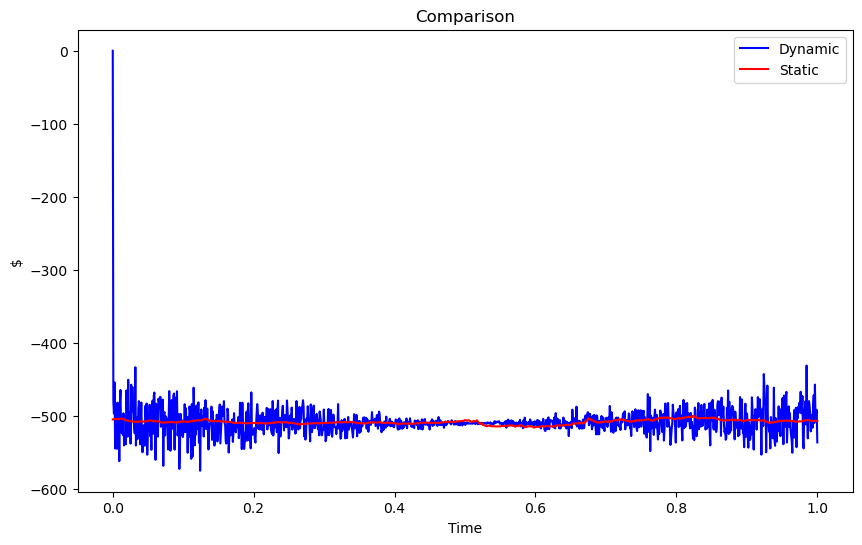

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

### Simulation

In [41]:
S1_0 = 28823.68359375
S2_0 = 1936.41796875
mu_1 = -0.06527786536083667
mu_2 = -0.1014501615563625
sigma_1 = 0.030886360418702075
sigma_2 = 0.04127523696600412
rho = 0.8762852422627018
z_0 = 0.00
beta = 1.6164669402684022
gamma = 0.5
delta = 0.8
T = 1
M = 1440

In [42]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [43]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Simulated Cryptocurrency Price')

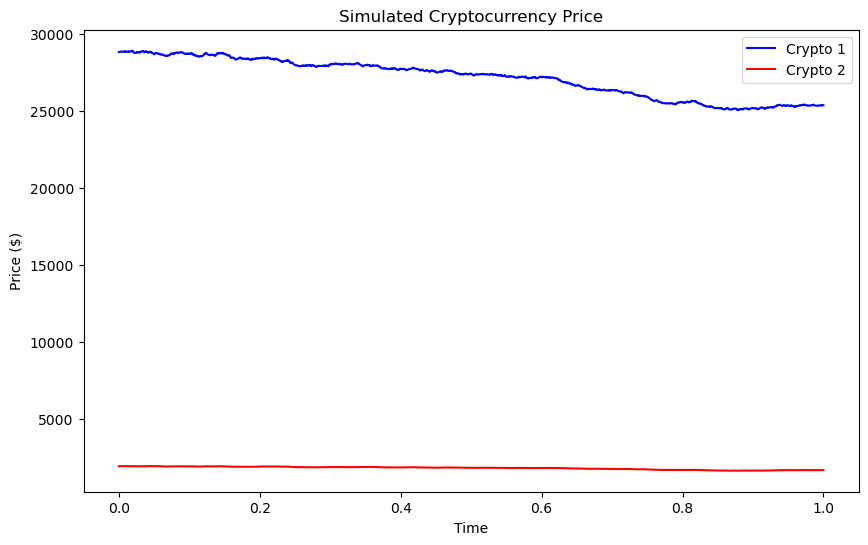

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Crypto 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Crypto 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Simulated Cryptocurrency Price')

Text(0.5, 1.0, 'z')

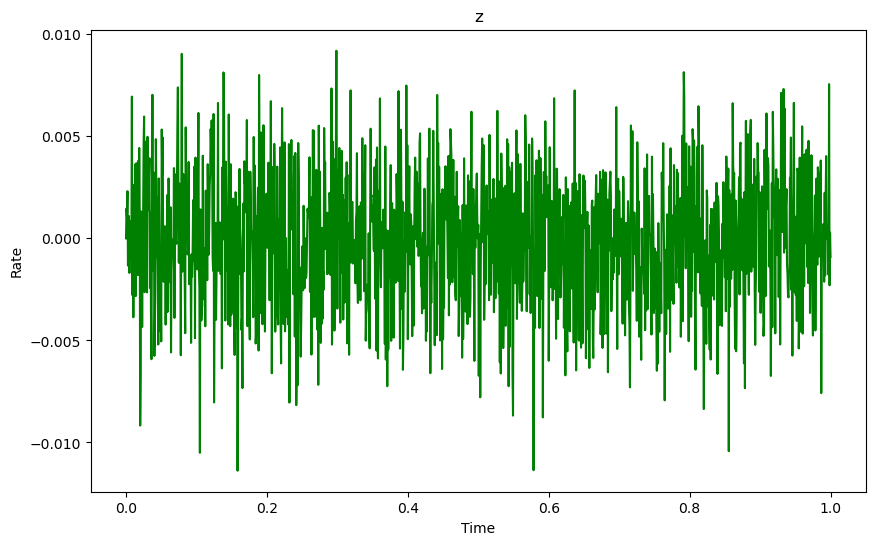

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [48]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho)

Text(0.5, 1.0, 'Simulation Weights')

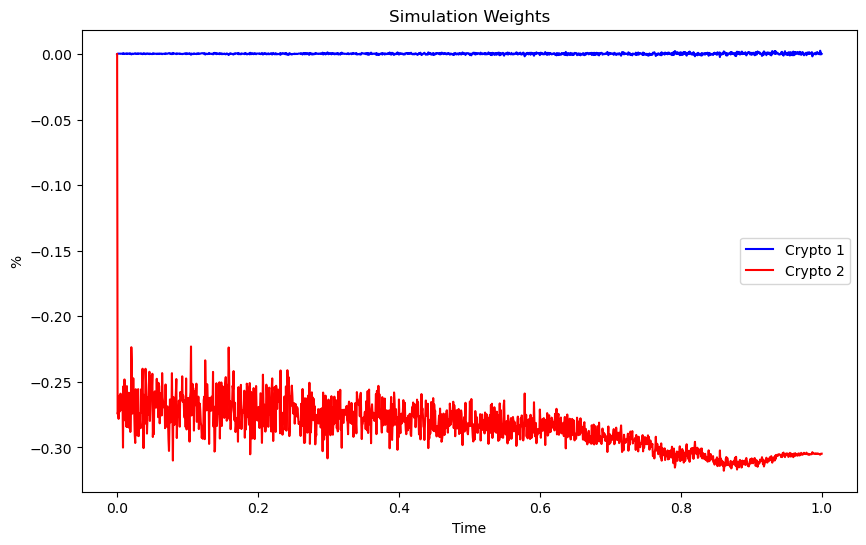

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='Crypto 1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='Crypto 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Simulation Weights')

Text(0.5, 1.0, 'Simulation Wealth Process')

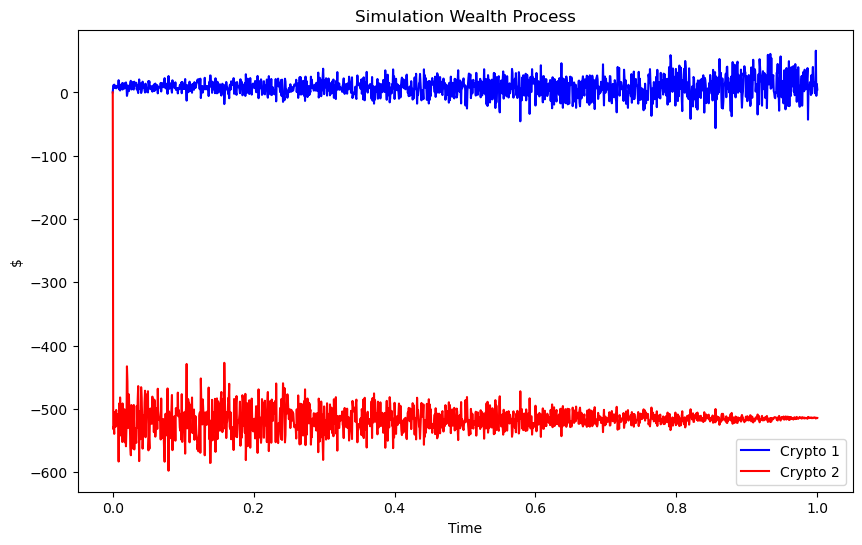

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Crypto 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Crypto 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulation Wealth Process')

In [51]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Simulation Wealth')

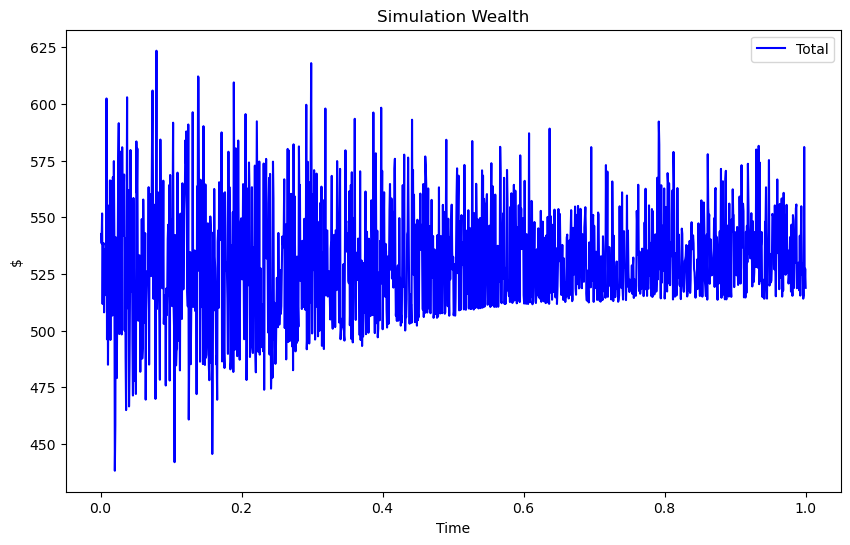

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulation Wealth')

In [54]:
# Initial Wealth
Wealth[1]

array([542.64231229])

In [55]:
# Ending Wealth
Wealth[-1]

array([518.84446774])

In [56]:
# Return
(Wealth[-1] - Wealth[1])/Wealth[1]

array([-0.04385549])

Text(0.5, 1.0, 'Simulation Comparison')

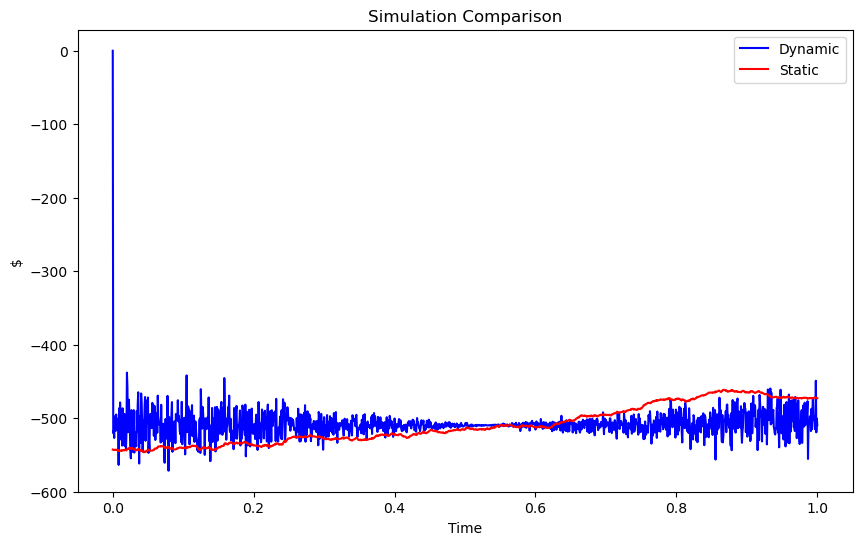

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulation Comparison')